### Кейс №1
1) Ваш продукт - это школа английского языка [Лендинг для языковой школы](http://english22.tilda.ws/). Проанализируйте
конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по
улучшению первого экрана лендинг. 
---

Изучив лендинговую страницу и страницы конкурентов, предлагаю следующие гипотезы для улучшения:

1. Если добавить основное меню в header для всех пользователей, то уменьшиться количество отказов на 1%, потому что пользователям будет проще найти необходимую информацию по услугам
2. Если изменить надпись "Оттачивайте английский с лучшими преподавателями и носителями языка – это комфортно и доступно." на "Обучение английскому с нуля до свободного общения на различные темы", то увеличится конверсия в покупку на 2%, так как клиент понимает предоставляемые услуги.
3. Изменить цветовую тему основной страницы на актуальный "нежный персиковый" позволить снизить количество отказов на 2%, потому что цвет будет соответствовать тому на что лди обращают внимание и какие ценности для них важны по [исследованию института цвета Pantone](https://www.pantone.com/color-of-the-year/2024)
4. Если мы добавим логотип школы, то это позволит повысить удержание пользователя на 1%, потому что пользователь будет запоминать логотип и название школы 

### Кейс №2
Подведите результаты эксперимента в экселе по следующим данным: [ab_stats.csv - Google Диск](https://drive.google.com/file/d/1XYk_NrBvrpx9IEA-_0gSndcINuoGudW6/view):
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind
from statsmodels.stats.power import TTestIndPower
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv("ab_stats - ab_stats.csv")
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


В данных нет данных с пропусками

In [4]:
df.duplicated().sum()

3733

В данных присутствуют дубликаты в количестве 3733. Удалим дубликаты.

In [5]:
df.drop_duplicates(inplace=True)
df.shape 

(19919, 5)

Распределение результатов:

In [6]:
df_grouped = df.groupby('ab_group', as_index=False).agg({'num_purchases': 'count', 'revenue': 'sum'}).rename(columns={'num_purchases': 'users'})
df_grouped 

,ab_group,users,revenue
0,A,9989,4786.807972
1,B,9930,2892.735789


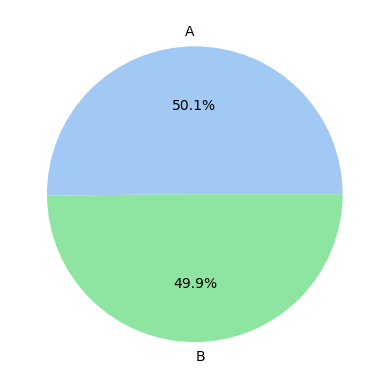

In [7]:
colors = sns.color_palette('pastel6')
plt.pie(df_grouped.users, labels=df_grouped.ab_group, colors=colors, autopct='%.1f%%')
plt.show()

В каждой группе примерно одинаковое количество пользователей, но доход в каждой из групп значително отличается.

Рассмотрим каждую группу

In [8]:
df_A = df[(df.ab_group == 'A') & (df.revenue > 0)]
df_B = df[(df.ab_group == 'B') & (df.revenue > 0)]
df_B.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
11936,0.259450,1,1,B,8.932191
11948,1.002704,1,1,B,3.116331
11999,69.940000,6,1,B,13.614101
12073,63.323518,4,1,B,1.205155
12086,15.922366,2,1,B,12.034099


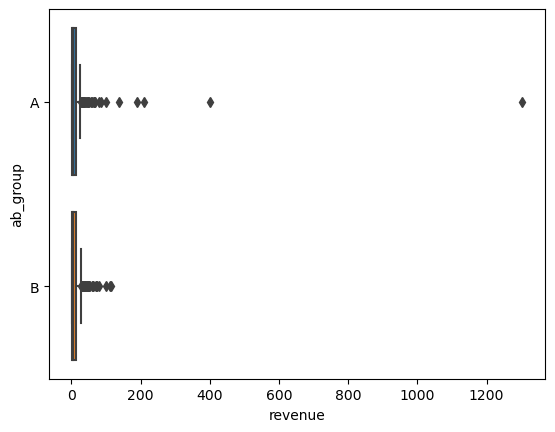

In [9]:
sns.boxplot(data=df.query('revenue > 0'), x='revenue', y='ab_group')
plt.show()

In [10]:
df_A.describe()

,revenue,num_purchases,purchase,av_site visit
count,256.000000,256.000000,256.0,256.000000
mean,18.698469,2.343750,1.0,6.753074
std,87.527589,9.723582,0.0,2.043753
min,0.259689,1.000000,1.0,0.996753
25%,2.318301,1.000000,1.0,5.281247
50%,4.283160,1.000000,1.0,6.871241
75%,11.923141,2.000000,1.0,8.257506
max,1303.609284,152.000000,1.0,12.504262


In [11]:
df_B.describe()


,revenue,num_purchases,purchase,av_site visit
count,234.000000,234.000000,234.0,234.000000
mean,12.362119,1.841880,1.0,6.844776
std,19.007065,2.354021,0.0,3.970112
min,0.259373,1.000000,1.0,-5.646523
25%,2.319883,1.000000,1.0,4.009016
50%,3.980000,1.000000,1.0,7.143956
75%,12.274829,2.000000,1.0,9.776519
max,113.830000,25.000000,1.0,16.955948


Исходя из графиков и описания рядов данных можно прийти к выводу, что в представленных данных присутствуют выбросы в виде разовых покупок на крупную сумму. Поскольку данна ситуация не типична, то необходимо исключитть выбросы

In [13]:
df_A_clean = df_A[df_A.revenue < df_A.revenue.quantile(0.975)]
df_A_clean.describe()

,revenue,num_purchases,purchase,av_site visit
count,249.000000,249.000000,249.0,249.000000
mean,9.486302,1.542169,1.0,6.754879
std,13.422091,1.139127,0.0,2.052495
min,0.259689,1.000000,1.0,0.996753
25%,2.303378,1.000000,1.0,5.275766
50%,4.075668,1.000000,1.0,6.880515
75%,10.292411,2.000000,1.0,8.309245
max,79.970000,8.000000,1.0,12.504262


In [18]:
df_a_clean.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
54,1.002159,1,1,A,6.392489
82,2.990000,1,1,A,8.596604
104,49.990000,1,1,A,8.885633
110,22.093757,4,1,A,8.708759


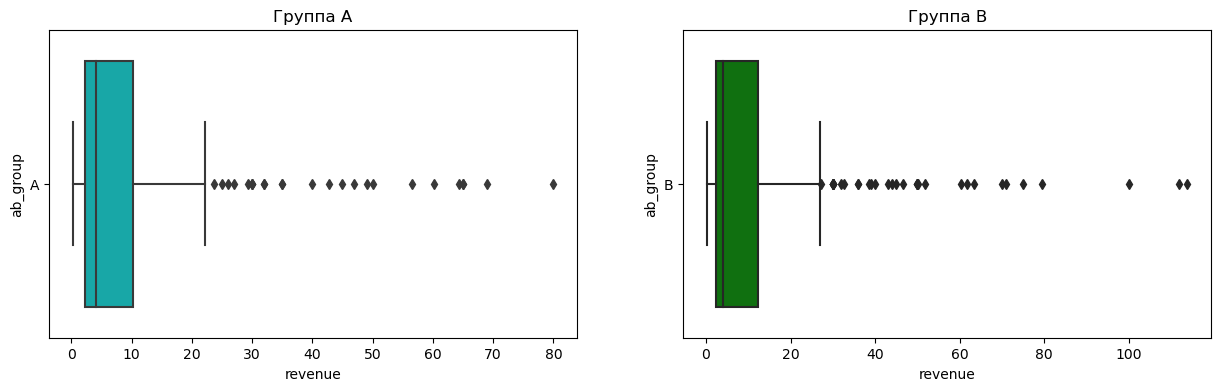

In [24]:
fig, (ax_boxplot, ay_boxplot) = plt.subplots(1, 2, figsize=(15, 4))
ax_boxplot.set_title('Группа А')
ay_boxplot.set_title('Группа B')
sns.boxplot(data=df_A_clean, x='revenue', y='ab_group', ax=ax_boxplot, color='c')
sns.boxplot(data=df_B, x='revenue', y='ab_group', ax=ay_boxplot, color='g')
plt.show()

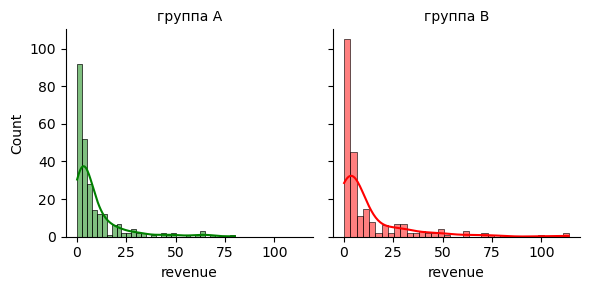

In [27]:
d = {'color': ['g', 'r']}
combined_df = pd.concat([df_A_clean, df_B])
g = sns.FacetGrid(data=combined_df, col ='ab_group', col_wrap=2, hue_kws=d, hue='ab_group')
g.map(sns.histplot, 'revenue', kde=True)
g.set_titles(col_template="группа {col_name}");

Подсчитаем средние значения в группах

In [30]:
print('ARPPU (среднее значение) ')
print("Группа А:", f"{df_A_clean['revenue'].mean():.4f}\n" 
      "Группа В:", f"{df_B['revenue'].mean():.4f}")

ARPPU (среднее значение) 
Группа А: 9.4863
Группа В: 12.3621


Медианы по группам

In [31]:
print("Группа А:", f"{df_A_clean['revenue'].median():.4f}\n" 
      "Группа В:", f"{df_B['revenue'].median():.4f}")

Группа А: 4.0757
Группа В: 3.9800


Получены близкие по значениям группы.

Согласно полученных графиков распределение в группах не нормальное.

Определим имеются ли статистически значимые различия в группах.

Поскольку размер выборки небольшой применим критерий Манна-Уитни

In [34]:
mannwhitneyu(df_A_clean.revenue.values, 
             df_B.revenue.values)

MannwhitneyuResult(statistic=28097.5, pvalue=0.49940952593129473)

p-value > 0.05 => нет статистически значимых различий, недостаточно оснований для отклонения нулевой гипотезы. 

Рассмотрим ARPPU для всех пользователей

<Axes: xlabel='num_purchases', ylabel='ab_group'>

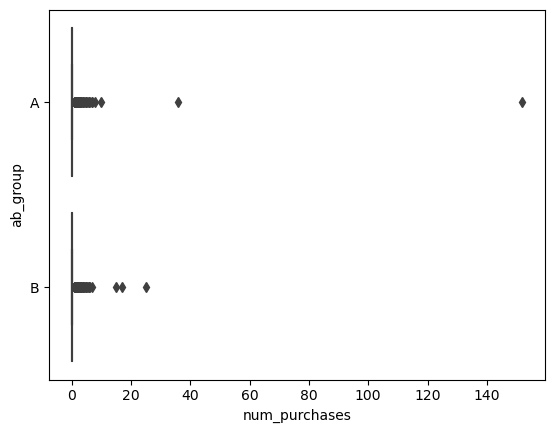

In [40]:

sns.boxplot(df, x='num_purchases', y='ab_group')

Уберем выброс в группе А

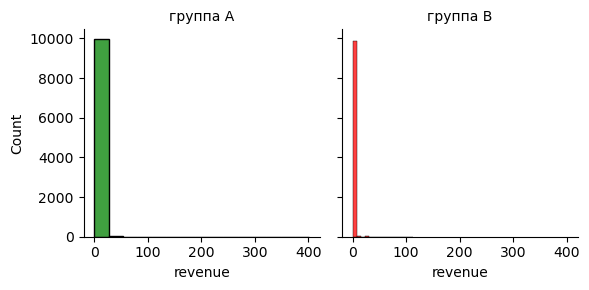

In [43]:
df_clear = df[df.num_purchases <=100]

d = {'color': ['g', 'r']}
g = sns.FacetGrid(data=df_clear, col ='ab_group', col_wrap=2, hue_kws=d, hue='ab_group')
g.map(sns.histplot, 'revenue')
g.set_titles(col_template="группа {col_name}");

In [45]:
df_clear.query('ab_group == "A"').shape, df_clear.query('ab_group == "B"').shape

((9988, 5), (9930, 5))

Полученные группы примерно одинаковые. Распределение дохода в группах не нормальное. Поскольку наблюдений много применим тесты Манна-Уитни и критерий Стьюдента

In [46]:
mannwhitneyu(df_clear.query('ab_group == "A"').revenue.values, 
             df_clear.query('ab_group == "B"').revenue.values)

MannwhitneyuResult(statistic=49687559.5, pvalue=0.37180663457349694)

In [51]:
ttest_ind(df_clear.query('ab_group == "A"').revenue.values, 
             df_clear.query('ab_group == "B"').revenue.values, equal_var = False)

Ttest_indResult(statistic=0.8429300531635012, pvalue=0.39927998641958473)

В обоих случаях p-value > 0.05 - нет статистически значимых различий

Проверим мощность теста

In [54]:
alpha = 0.05

C_mean = df_clear.query('ab_group == "A"')['revenue'].values.mean()
T_mean = df_clear.query('ab_group == "B"')['revenue'].values.mean()

C_std = df_clear.query('ab_group == "A"')['revenue'].values.std()
T_std = df_clear.query('ab_group == "B"')['revenue'].values.std()

S = np.sqrt((T_std**2 + C_std **2)/ 2)
effect_size =float((T_mean-C_mean)/ S)

n = df_clear.query('ab_group == "A"').shape[0]

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, power=None, nobs1=n, ratio=1.0, alpha=alpha)
print(f'Мощность теста: {result*100:.2f}%')

Мощность теста: 13.47%


Мощность теста недостаточна для выявления статистически значимых различий.

Рассчитаем размер необходимой выборки:

In [57]:
power = 0.8
N = analysis.solve_power(effect_size=effect_size, power=power, nobs1=None, ratio=1.0, alpha=alpha)
round(N), round(N/n)

(110155, 11)

В представленом наборе данных статистически значимых различий не выявлено. Тем не менее мощность проведенного теста недостаточна для выявления различий междугруппами. Оснований для отклонения нулевой гипотезы не достаточно. Необходимо увеличить размер выборки 

---

### Кейс №3

Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.

    3.1. За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
    результатам подсчета?

    3.2. Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите    
    результаты тестирования, если у нас следующие результаты по количеству конверсии:
1) 25 000
2) 30 000
3) 32 000

### 3.1. 

Для решения теста воспользуемся [калькулятором](https://mindbox.ru/tools/ab-test-calculator/)

![Результат расчета калькулятора](3.1.png)

In [59]:
print("Необходимый объем выюорки для 3 источников трафика:", 516176*3, "человека") 

Необходимый объем выюорки для 3 источников трафика: 1548528 человека


In [60]:
print("Необходимое количество месяцев для проведения эксперимента:", round(1548528/40000))

Необходимое количество месяцев для проведения эксперимента: 39


Вывод: количество посетителей нашего сайта недостаточно для проведения эксперимента. Необходимо увеличить ожидаемый прирост до 1% для проведения тестирования в текущих условиях

![Расчет при измененном приросте](3.1summary.png)

In [63]:
print("Количество месяцев при измененном ожидаемом приросте конверсии 1%:", round(20647*3/40000, 1), "месяца")

Количество месяцев при измененном ожидаемом приросте конверсии 1%: 1.5 месяца


### 3.2

![Результатытестирования](3.2.png)

Вариант С показал наилучшие результаты в приросте конверсии, но для обеспечения прироста достаточно и варианта В

### Кейс 4

Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили ,
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

Для выборок объемом более 50 тест Шапиро-Уилка может давать ложно положительные результаты. Для получения более надежных результатов в нашей выборке необходимо сипользовать критерий Колмогорова-Смирнова. можно построить QQplot и гистограмму для анализа распределения на выборке. Если распределение нормальное, то для оценки статистичской значимости различий в группах можно применить критерий Стьюдента, иначе Манна-Уитни или применить метод бутстрап. 

---

### Кейс 5
Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные.

Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802
B) Средняя - 352, отклонение - 58, количество - 9789

Для решения кейса воспользуемся [калькулятором](https://www.evanmiller.org/ab-testing/t-test.html)

![Результаты эксперимента](5.png)

По результатам эксперемента получено значение p-value < 0.001 
Имеются статистически значимые различия в экспериментах.
В продакшен необходимо выкатывать версию А

### Кейс 6
Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1) Управленческий процесс по договоренностям с внешними партнерами
2) Архитектуру данных с указанием систем, из которых будем скачивать данные
3) Внутрикомандное взаимодействие

Управленческий процесс по договоренностям с внешними партнерами

Задача: Добиться договоренности с банком о 99% кэшбэке на подписку первого месяца.

Ответственные: Руководитель проекта, менеджер по продажам, менеджер по работе с партнерами.

Этапы:

1. Подготовка: Сбор информации о банке, его продуктах и услугах, а также о его политике по кэшбэку.
1. Анализ: Оценка потенциала договоренности с банком, расчет потенциального эффекта от нее.
1. Переговоры: Проведение переговоров с банком, обсуждение условий договоренности.
1. Подписание договора: Подписание договора о сотрудничестве с банком.
1. Архитектура данных

Источники данных:

* Система аналитики онлайн-кинотеатра (данные о конверсии в подписку, о поведении пользователей, о их устройствах).
* Система аналитики банка (данные о транзакциях пользователей, о их финансовом положении).
Целевые данные:

* Данные о конверсии в подписку в двух группах пользователей: в группе с 99% кэшбэком и в группе без кэшбэка.
* Данные о поведении пользователей в двух группах: в группе с 99% кэшбэком и в группе без кэшбэка.
* Данные о устройствах пользователей в двух группах: в группе с 99% кэшбэком и в группе без кэшбэка.
Системы хранения данных:

* База данных аналитики онлайн-кинотеатра.
* База данных аналитики банка.
* Внутрикомандное взаимодействие

Участники:

* Руководитель проекта
* Аналитик данных
* Тестировщик
* Маркетолог

Обязанности:

* Руководитель проекта: отвечает за общее руководство проектом, за взаимодействие с внешними партнерами.
* Аналитик данных: отвечает за сбор и анализ данных, за проведение статистического анализа.
* Тестировщик: отвечает за разработку и проведение тестов.
* Маркетолог: отвечает за разработку и реализацию маркетинговых мероприятий.

Взаимодействие:

* Руководитель проекта взаимодействует со всеми участниками проекта, обеспечивает координацию их работы.
* Аналитик данных взаимодействует с тестировщиком для получения данных о результатах тестов.
* Маркетолог взаимодействует с руководителем проекта для получения информации о результатах теста и для разработки маркетинговых мероприятий.
